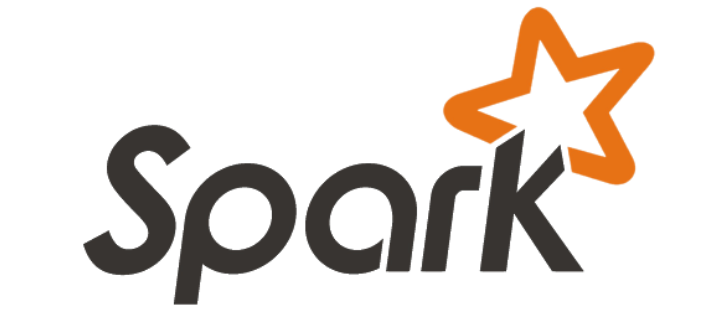

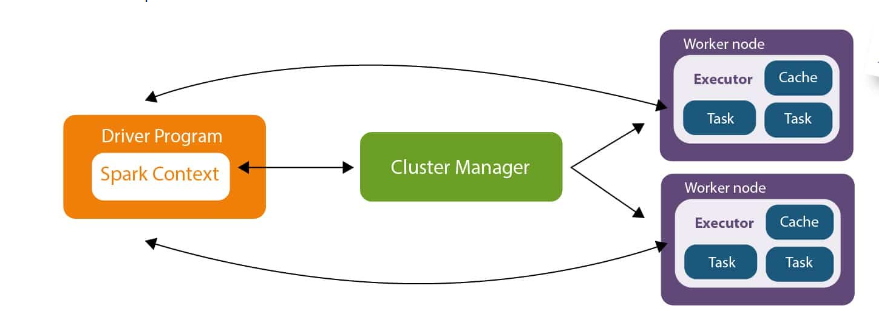

<b>Driver</b> - programming API connection to Spark functionality (DF, DAtaset,SQL queries etc.)

Driver process может запускаться на мастере а может на workers (продакшен)

Driver process запускает метод main(), который созаёт SparkContext а в современности SparkContext сверху инкапсулирован надстройкой SparkSession.

<b>Master Node</b> - машина на которой пишется и запускается код на выполнение. Run process SparkMaster Daemon.

<b>Cluster Manager</b> StandAlone, Yarn, K8s

to manage resources and alocate them to SparkApp

<b>Worker node</b> ~= железо.

<b>Executor</b> - выполняющийся процесс. На ноде несколько экзекуторов (1 к 1 ядру)

! Lazy Evaluation

<b>Job</b> ~= DAG // <b>Stages</b> // <b>Tasks</b>

Новая стейдж - после решафла (Narrow and Wide Operation !)

Task - выполнения задания по инструкции.

SparkSession - логический центр спарк. 

    1) Нарезает код на Jobs, Stages, Tasks
    2) Создает Logical Plan - Optimized Logical Plan - Physical Plans
    3) Координируется с ClusterManager для отправки tasks на executors. Также на СМ отправляется физикал план.
    4)отслеживает процесс исполнения
    

логические оптимизации, которые применяет оптимизатор когда из логического плана получает оптимизированный логический.
Rule-based optimization:

    - Predicate pushdown (~= фильтр строк)
    - Projection pushdown (read только нужные колонки)
    - Partition pruning (Требуется под капотом Hive metastore db)

На основе Optimized Logical Plan создаётся несколько логических планов, они сравниваются по cost и выбирается лучший

начиная с 3 версии есть AQE - перепроверка плана после каждой stage и корректировка на ходу

### Join Strategies that are available in Apache Spark:

Apache Spark has the following five algorithms to choose from –

1. Broadcast Hash Join

2. Shuffle Hash Join

3. Shuffle Sort Merge Join

4. Broadcast Nested Loop Join

5. Cartesian Product Join (a.k.a Shuffle-and-Replicate Nested Loop Join)

Выбирает так:

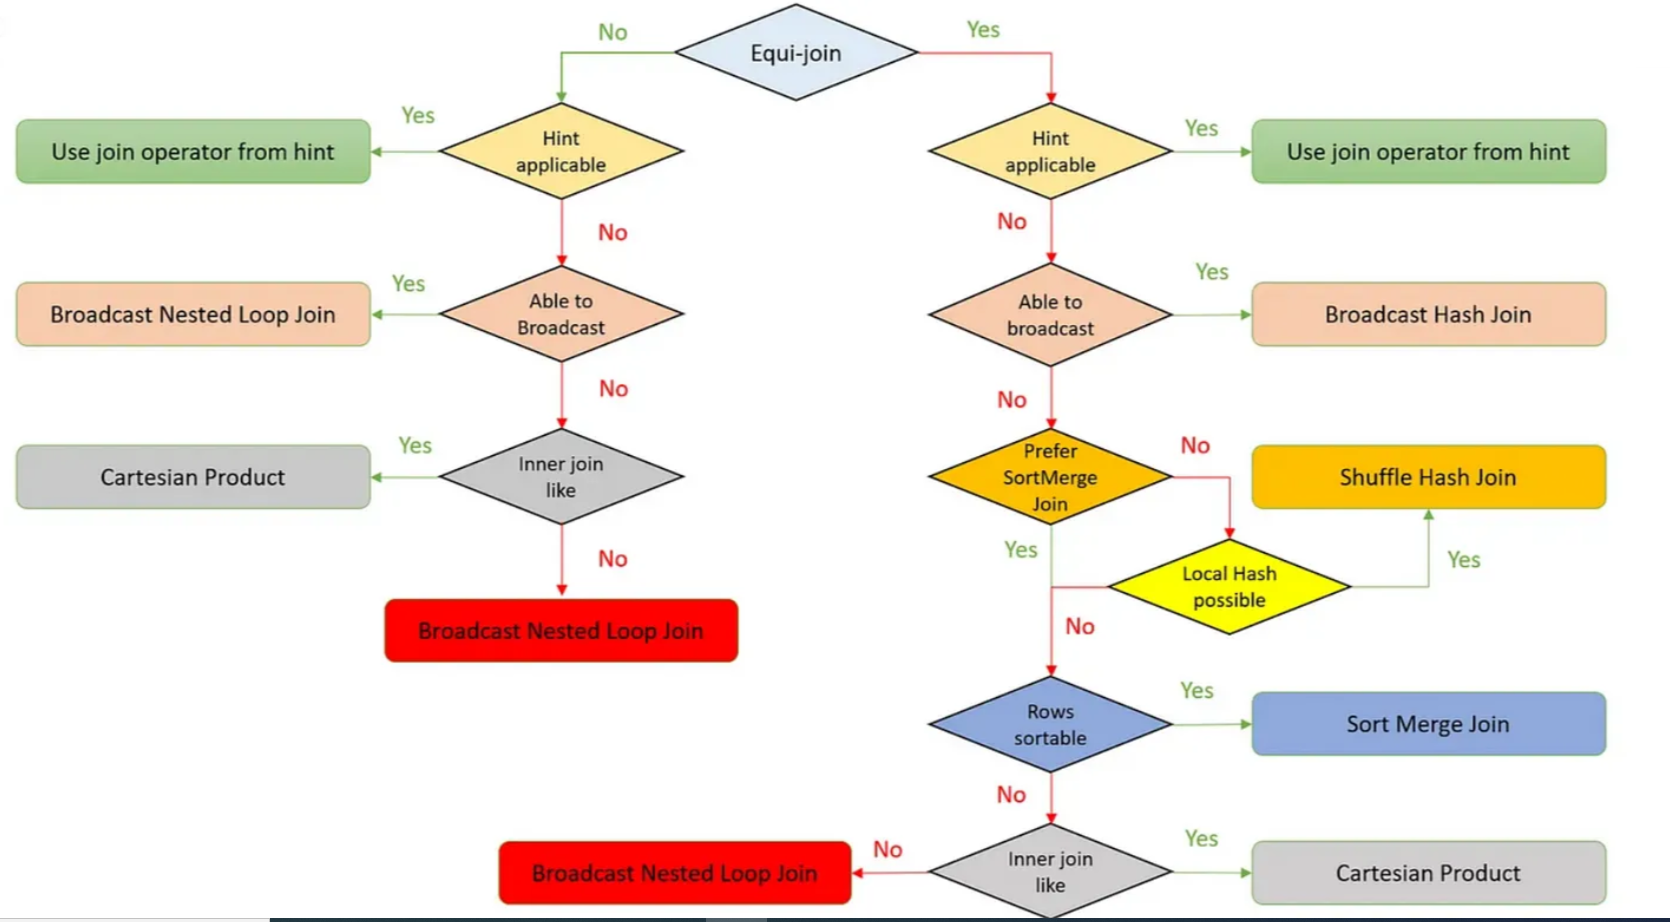

spark.sql.autoBroadcastJoinThreshold

This determines the maximum size of the DataFrame that can be broadcasted.
Default == 10Mb


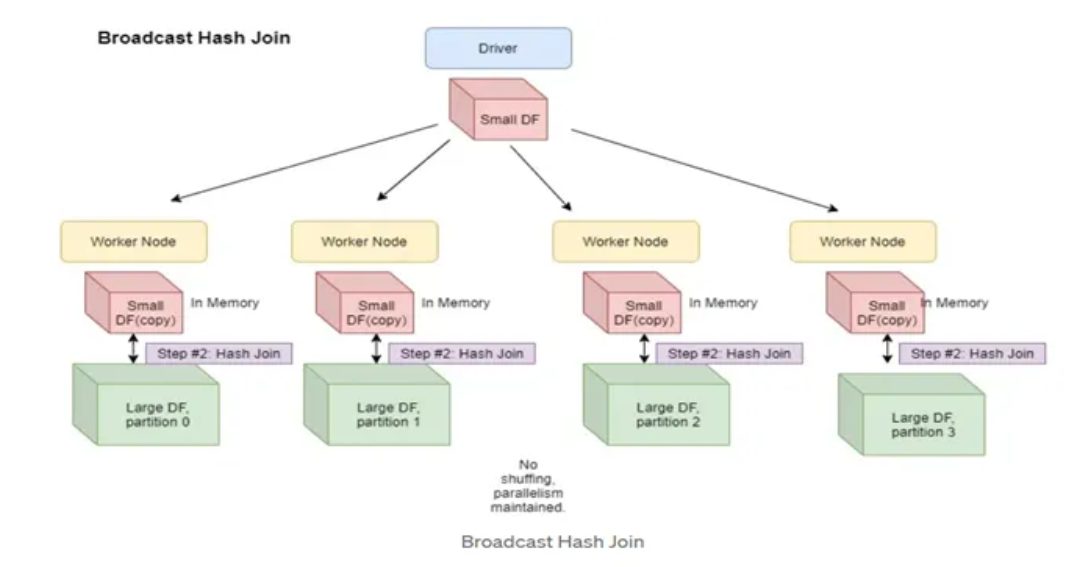

<b>Some key points regarding Broadcast Hash Join:</b>

a. Only supported for equi-joins (joins with ‘=’ condition).

b. Supports all types of joins (inner, left, right) except full-outer-join.

c. If the DataFrame that is being broadcasted is too large, it can lead to excessive memory consumption and potential out-of-memory errors.

d. Broadcasting the smaller DataFrame to all worker nodes can generate significant network traffic, especially when dealing with a large number of nodes and can be very costly.

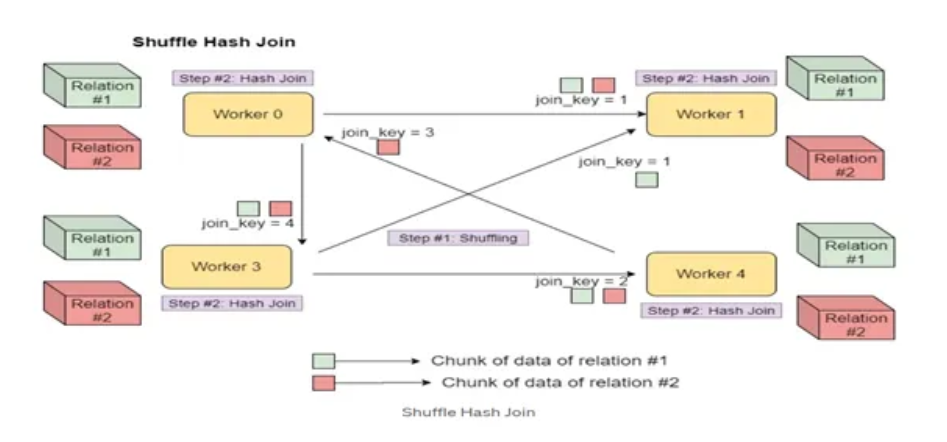

<b>Some key points regarding Shuffle Hash Join:</b>

a. Works only for equi-joins.

b. Works for all join types.

c. Works well when a dataset cannot be broadcasted but one side of partitioned data after shuffling will be small enough for hash join.

d. Faster than a sort merge join since sorting is not involved.

e. Works for a balanced dataset but not for a skewed dataset as it may lead to out-of-memory errors.

<b> Shuffler Sort Merge Join: </b>
    
As the name indicates, it has 3 phases.

    1. Shuffle Phase: both datasets are shuffled.

    2. Sort Phase: records are sorted by key on both sides.

    3. Merge Phase: iterate over both sides and join based on the join key.

(*) Shuffle Sort Merge Join is preferred when both datasets are big and cannot fit in memory — with or without shuffle.

<b>Some Important Points regarding Shuffle-Sort-Merge Join:</b>.

a. Works only on equi-joins.

b. Works on all join-types.

c. Both shuffle and sort are expensive operations.

<b> Broadcast Nested Loop Join:</b>

Broadcast Nested Loop join works by broadcasting one of the entire datasets and performing a nested loop to join the data. So essentially every record from dataset 1 is attempted to join with every record from dataset 2.

<b>Some important points regarding Broadcast Nested Loop Join:</b>

a. Works for both equi and non-equi joins.

b. Works for all join types.

c. When you specify broadcast as one of the hints and it’s a non-equi join, then spark query optimizer always chooses this strategy.

d. This join will not work when both sides “are big enough for broadcasting and you could see <u>Out Of Memory</u> exceptions.

e. It is quite slow because essentially every record from dataset 1 is attempted to join with every record from dataset 2.

### CACHE PERSIST CHECKPOINT ###


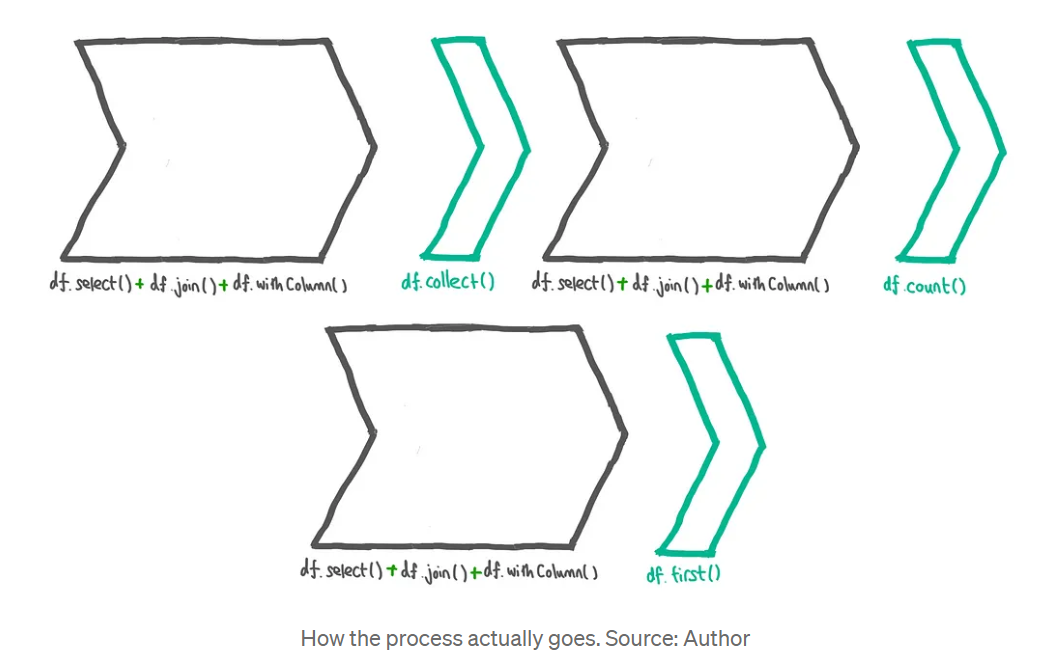

<b>_________________________________________________________________________________________________________________</b>

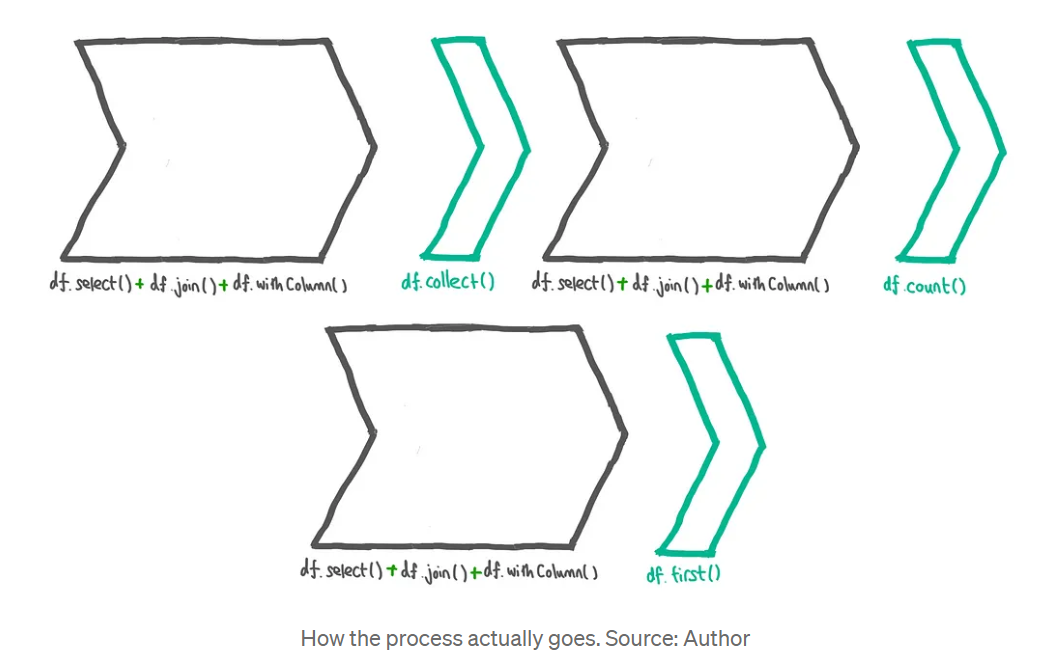

<b>_________________________________________________________________________________________________________________</b>

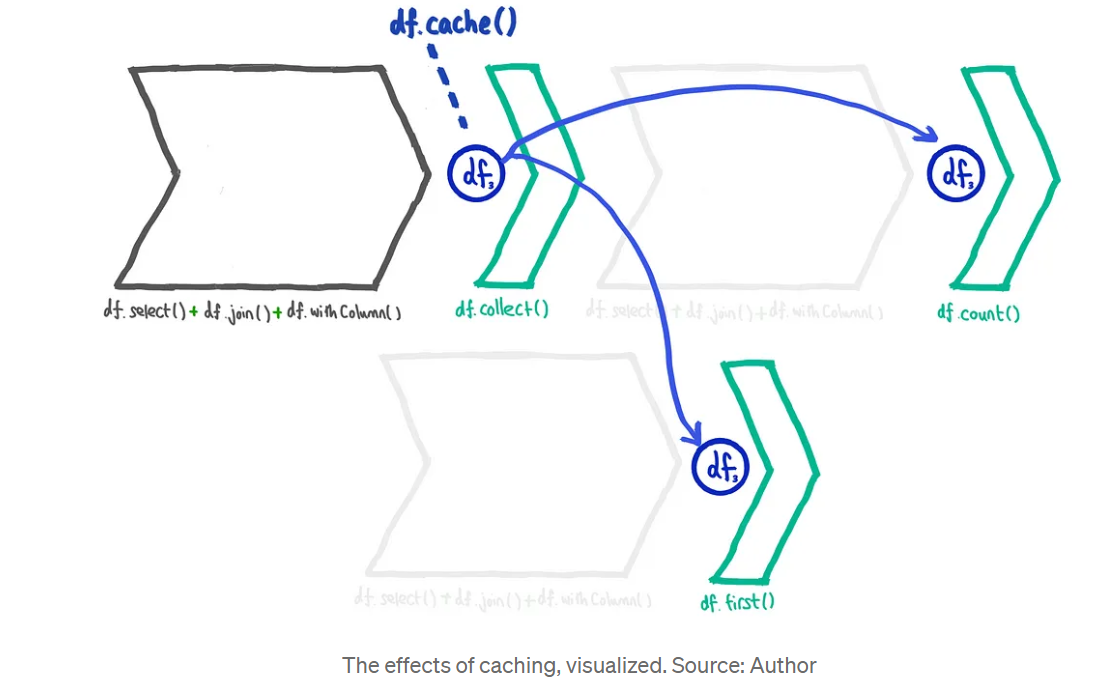


Caching is a spark storage method where you can save the state of your dataframe in the middle of your pipeline.

But remember, a cache is suitable when there are multiple actions. If you’re only going to invoke one action in your pipeline, it’s generally not worth the investment to cache your dataframe.

Persist is a more versatile version of caching. It stores the dataframe in a combination of memory and/or disk, of your choosing. This option is useful if you want more storage versatility.

Checkpoint stores the latest dataframe in a distributed file system such as HDFS/S3, and doesn’t maintain data lineage.